<center>
<h1>CSCI3151 - Foundations of Machine Learning</h1>
<h2>Assignment 3</h2>

<b> Due on: March 17th, 2024 at 23:59 ADT</b>
<b> Can be completed in groups of 2 or 3</b>

<small>(One submission per group, and you must list all group members at the top of that submission)</small>
</center>

[Assignment Submission Instructions](https://docs.google.com/document/d/1iHzvkaZzNyZJ54Qw4eXJYOC2vzQUPliMyEBbZVRiS4Q/edit?usp=sharing)

### Group Members:

1. Mark Jerald Santiago
2.
3.

# 1. Convolutional Neural Networks [5 points]

This question builds on A2 Q2.

Use the CIFAR-100 dataset (available from Keras) to train and assess the convolutional neural network provided below.

In [114]:
def build_cnn(input_shape, num_classes):
    model = Sequential(name="cnn")
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))

    return model

you will have to provide the arguments. Feel free to strip the model code out of the function if you want.

## a) Loss & Accuracy vs. Num. Epochs [2 points]
Generate a plot that shows loss & accuracy for training and test sets as a function of the number of epochs. Indicate what a reasonable number of epochs should be.

> MARKER NOTE: 1 points for good training code, 1 points for proper plot.

In [93]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from keras.callbacks import History
history = History()

In [124]:
from keras.datasets import cifar100
from keras.utils import to_categorical

(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')
X_train, X_test = x_train_original.astype('float32') / 255.0, x_test_original.astype('float32') / 255.0

In [125]:
# split and shuffle data set to train, valid, and test
def re_split(x_train_original, x_test_original, y_train_original, y_test_original):
    x_train_combined = np.append(x_train_original, x_test_original, axis=0)
    y_train_combined = np.append(y_train_original, y_test_original)

    indices = np.arange(x_train_combined.shape[0])
    np.random.shuffle(indices)

    x_new = x_train_combined[indices]
    y_new = y_train_combined[indices]

    size = x_new.shape[0]
    # sets
    train_split = int(size * .7)
    valid_split = int(size * .15)
    test_split = int(size * .15)

    x_train_set = x_new[:train_split]
    y_train_label = y_new[:train_split]

    x_valid_set = x_new[train_split:valid_split + train_split]
    y_valid_label = y_new[train_split:valid_split + train_split]

    x_test_set = x_new[-test_split:]
    y_test_label = y_new[-test_split:]

    return x_train_set, y_train_label, x_valid_set, y_valid_label, x_test_set, y_test_label

In [126]:
x_train_set, y_train_label, x_valid_set, y_valid_label, x_test_set, y_test_label = re_split(X_train, X_test, y_train_original, y_test_original)

In [133]:
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers.legacy import Adam

# Model configuration
batch_size = 64
loss_fn = "sparse_categorical_crossentropy"
optimizer = Adam()
validation_split = 0.2

num_classes = len(np.unique(y_train_original))# you find this
input_shape = (len(x_train_set[0]),len(x_train_set[0][0]),len(x_train_set[0][0][0]))# you find this
num_epochs = 100# you set this

use your model's built-in `compile()` and `fit()` methods

In [98]:
# your code here
new_model = build_cnn(input_shape=input_shape, num_classes=num_classes)
new_model.compile(loss=loss_fn, optimizer=optimizer, metrics='sparse_categorical_accuracy')

hist = new_model.fit(x_train_set, y_train_label, validation_data=(x_valid_set, y_valid_label), epochs=num_epochs, batch_size=batch_size, shuffle=True)

Epoch 1/100
657/657 [==============================] - 33s 48ms/step - loss: 3.9934 - sparse_categorical_accuracy: 0.0880 - val_loss: 3.5290 - val_sparse_categorical_accuracy: 0.1653
Epoch 2/100
657/657 [==============================] - 30s 46ms/step - loss: 3.3089 - sparse_categorical_accuracy: 0.2017 - val_loss: 3.0222 - val_sparse_categorical_accuracy: 0.2653
Epoch 3/100
657/657 [==============================] - 32s 49ms/step - loss: 2.9486 - sparse_categorical_accuracy: 0.2702 - val_loss: 2.7318 - val_sparse_categorical_accuracy: 0.3148
Epoch 4/100
657/657 [==============================] - 30s 45ms/step - loss: 2.7050 - sparse_categorical_accuracy: 0.3158 - val_loss: 2.5638 - val_sparse_categorical_accuracy: 0.3478
Epoch 5/100
657/657 [==============================] - 31s 47ms/step - loss: 2.5303 - sparse_categorical_accuracy: 0.3518 - val_loss: 2.4768 - val_sparse_categorical_accuracy: 0.3747
Epoch 6/100
657/657 [==============================] - 30s 46ms/step - loss: 2.3769 -

In [107]:
new_model.evaluate(x_test_set, y_test_label)

282/282 [==============================] - 2s 5ms/step - loss: 2.9287 - sparse_categorical_accuracy: 0.4402


[2.9287405014038086, 0.44022223353385925]

In [108]:
def graph_hist(data, key, legend, title, xlabel, ylabel, loc="upper left"):
    plt.title(title)
    for i in key:
        plt.plot(data.history[i])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(legend, loc=loc)

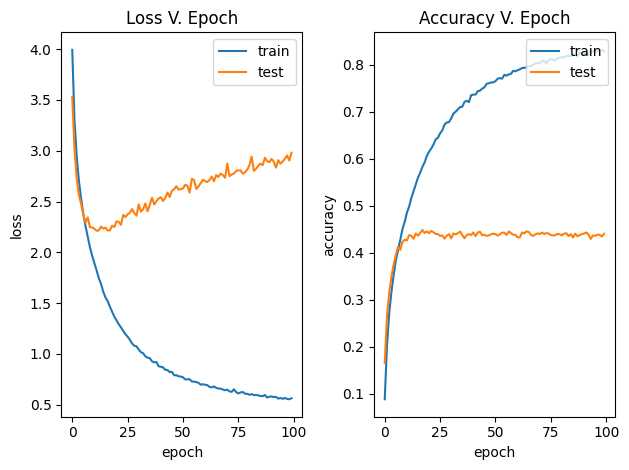

In [109]:
legend = ['train', 'test']

plt.subplot(1,2,1)
graph_hist(hist, ['loss', 'val_loss'], legend, 'Loss V. Epoch', xlabel='epoch', ylabel='loss', loc='upper right')

plt.subplot(1,2,2)
graph_hist(hist, ['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy'], legend, 'Accuracy V. Epoch', xlabel='epoch', ylabel='accuracy', loc='upper right')

plt.tight_layout()
plt.show()

Two plots showing the loss & accuracy of the model as a function of the epoch, we can see that the model is suffering from overfitting, the training loss & accuracy keeps improving but the testing loss & accuracy is increasing and stagnant respectively. With how the model is set up right now around 24 epochs is enough since we aren't improving. One way to improve this model is by having more data since we only have 600 images for each class.

## b) Loss & Accuracy vs Train Set Size [2 points]

Generate a plot that shows loss and accuracy for training and test sets as a function of the number of instances in the training set. For this part, you will be modifying your training set. For instance, you can run 10 experiments where you first use a random 10% of the training data, a second experiment where you use a random 20% of the training data, and so on until you use the entire training set. Keep the network hyperparameters constant during your experiments.

In [128]:
def train_size(x, t, set_size):
    index = np.arange(x.shape[0])
    np.random.shuffle(index)

    shuffle_x = x[index]
    shuffle_y = t[index]

    dim = shuffle_x.shape[0]
    # sets
    size = int(dim * set_size)
    return shuffle_x[:size], shuffle_y[:size]

In [139]:
def train(x_new, y_new):
    model_size_param = build_cnn(input_shape=input_shape, num_classes=num_classes)

    model_size_param.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics='sparse_categorical_accuracy')

    hist = model_size_param.fit(x_new, y_new, validation_data=(x_valid_set, y_valid_label), epochs=epoch, batch_size=batch_size)

    return hist

In [140]:
# your code here
set_size_param = [.10,.20,.30,.40,.50,.60,.70,.80,.90,1]
histry = []
epoch = 25

for i in set_size_param:
    x_new, y_new = train_size(x_train_set, y_train_label, i)
    histry.append(train(x_new, y_new))

Epoch 1/25
66/66 [==============================] - 5s 58ms/step - loss: 4.5672 - sparse_categorical_accuracy: 0.0190 - val_loss: 4.4356 - val_sparse_categorical_accuracy: 0.0259
Epoch 2/25
66/66 [==============================] - 4s 66ms/step - loss: 4.3695 - sparse_categorical_accuracy: 0.0331 - val_loss: 4.2781 - val_sparse_categorical_accuracy: 0.0391
Epoch 3/25
66/66 [==============================] - 4s 58ms/step - loss: 4.2048 - sparse_categorical_accuracy: 0.0526 - val_loss: 4.1126 - val_sparse_categorical_accuracy: 0.0733
Epoch 4/25
66/66 [==============================] - 4s 58ms/step - loss: 4.0432 - sparse_categorical_accuracy: 0.0764 - val_loss: 3.9975 - val_sparse_categorical_accuracy: 0.0866
Epoch 5/25
66/66 [==============================] - 4s 57ms/step - loss: 3.8205 - sparse_categorical_accuracy: 0.1069 - val_loss: 3.8347 - val_sparse_categorical_accuracy: 0.1191
Epoch 6/25
66/66 [==============================] - 4s 57ms/step - loss: 3.5903 - sparse_categorical_accu

In [169]:
def graph_(data, size_arr, keys, title):
    store = []
    plt.title(title)
    for i in data:
        store.append(i.history[keys][-1])
    plt.plot(size_arr, store, marker='o', mfc='red', mec='k')
    plt.grid()

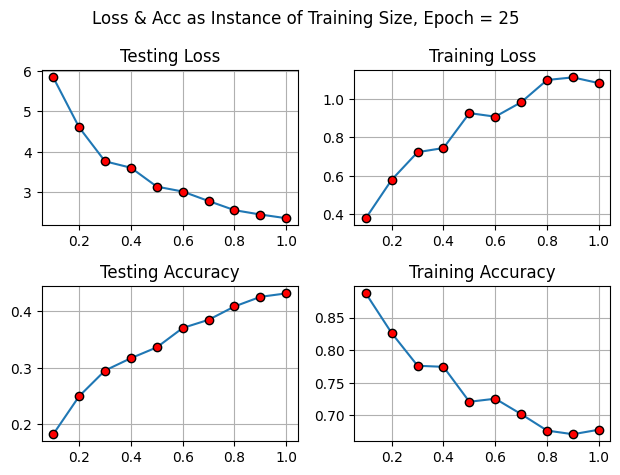

In [172]:
plt.suptitle('Loss & Acc as Instance of Training Size, Epoch = 25')
plt.subplot(2,2,1)
graph_(histry, set_size_param, 'val_loss', 'Testing Loss')
plt.subplot(2,2,2)
graph_(histry, set_size_param, 'loss', 'Training Loss')
plt.subplot(2,2,3)
graph_(histry, set_size_param, 'val_sparse_categorical_accuracy', 'Testing Accuracy')
plt.subplot(2,2,4)
graph_(histry, set_size_param, 'sparse_categorical_accuracy', 'Training Accuracy')
plt.tight_layout()
plt.show()

## c) Analysis [1 point]
Summarize your findings below.

I kept the 25 epochs from part a) since it started to plateau with a higher # of epoch, we can see here that as the size of the training set increased the testing loss and accuracy started to improve because our model had more information and generalized well, it in turn did make the training loss and training accuracy worse but that's to be expected as the model is no longer just memorizing the data set, this is also the reason why part a) started performing poorly, we just didn't have enough data; performing data augmentation to increase the # of data points we have would help tremendously.

# 2. Multi-layer Perceptrons [6 points]

## a) Implementation [3 points]

Implement a feedforward neural network by hand using only Python and **basic NumPy functions** for the task of binary classification. The network should have a two-dimensional input, one hidden layer, and use a nonlinear activation function. Mean Squared Error should be used as the cost function and all weights should be randomly initialized.

Your activation function and its derivative should be hardcoded and included below, e.g.:


``` python
def activation(x):
    return x^2

def activation_derivative(x):
    return 2*x
```

feel free to use lambda functions instead if you want.

In [359]:
import sys
import numpy as np

class mlp():
    def __init__(self, lr, num_in, num_hidden, num_out):
        self.error = []
        self.accuracy = []
        self.lr = lr
        self.num_hidden = num_hidden
        self.weights_in = np.random.random_sample((num_in, self.num_hidden))
        self.weights_out = np.random.random_sample((self.num_hidden, num_out))


    def activation(self, x): # use sigmoid
        # you implement
        return 1 / (1 + np.exp(-x))


    def act_der(self, x):
        # you implement
        return np.exp(-x)/((1+np.exp(-x))**2)


    def mse(self, sq_dif):
        sum = 0
        sq_dif = np.hstack(sq_dif)
        for i in range(len(sq_dif)):
            sum += sq_dif[i]
        return sum/len(sq_dif)


    def model_acc(self, model_predictions, true_labels):
        sum = 0
        for i in range(len(model_predictions)):
            if np.rint(model_predictions)[i] == true_labels[i]:
                sum+=1
        return sum/len(true_labels)


    def train(self, X, t, epoch):
        # you code the forward pass
        # i've used Roger Grosse's notation here
        for _ in range(epoch):
            z = np.dot(X, self.weights_in)# inputs dotted with input weights
            h = self.activation(z) # input to hidden layers (use activation function)
            y = np.dot(h, self.weights_out) # hidden layer output dotted with output weights
            predictions = self.activation(y)# prediction (be careful re. activation function usage, may want to code a softmax too)

            # error
            cost = predictions - t
            error = (predictions - t)**2 # you calculate error using MSE
            mse = self.mse(error)
            acc = self.model_acc(predictions, t)
            self.error.append(mse)
            self.accuracy.append(acc)

            # backprop output layer gradients
            delta_out = self.act_der(y)
            dcost_dout = cost * delta_out # y_bar
            dcost_weights_out = np.dot(h.T, dcost_dout) # weight_out_bar

            # backprop hidden layer gradients
            dcost_dah = np.dot(dcost_dout, self.weights_out.T) # pd. hidden_layer
            din_dhidden = self.act_der(z) # pd. input to hidden_layer
            dcost_weights_hidden = np.dot(X.T, din_dhidden * dcost_dah) # pd. weight_in

            # you update weights (this is where you use the learning rate)
            self.weights_in = self.weights_in - self.lr * dcost_weights_hidden
            self.weights_out = self.weights_out - self.lr * dcost_weights_out
            print(f"\rEpoch: {int(_) + 1}/{epoch} -- Error: {mse} | Accuracy: {acc}", end='')

        print("\nDone!")
        return self


    def predict(self, X, t=None):
        hidden_in = np.dot(X, self.weights_in)
        hidden_act = self.activation(hidden_in)
        out_in = np.dot(hidden_act, self.weights_out)
        pred = np.rint(self.activation(out_in))
        if t is not None:
            print(f"\rAccuracy: {self.model_acc(pred, t)}")

        return pred

## b) Training [1 point]
Train the model on the dataset below. Plot your error and your model's predictions.

> Note: Training this model may take far more epochs than previous models you may have worked with. On the order of hundreds of thousands.

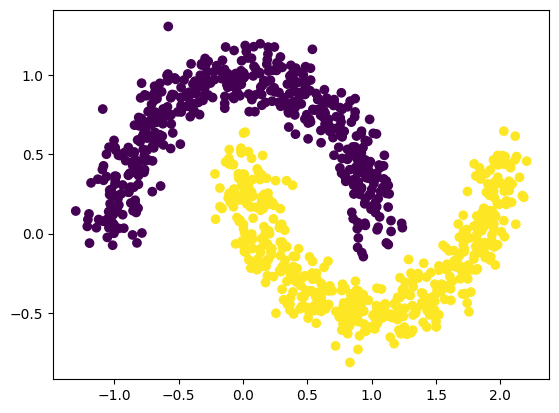

In [360]:
from sklearn import datasets
import matplotlib.pyplot as plt

# generate data
features, labels = datasets.make_moons(1000, noise=0.1, random_state=1)
labels = labels.reshape(1000, 1)

# plot dataset
plt.figure()
plt.scatter(features[:, 0], features[:, 1], c=labels)
plt.show()

In [361]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, shuffle=True)

# create and train your model here

In [380]:
# compile model
m_t = mlp(0.01, len(X_train[0]), 25, 1)

In [381]:
histm_t = m_t.train(X_train, y_train, 250000)

Epoch: 250000/250000 -- Error: 0.012756469297909731 | Accuracy: 0.9875
Done!


In [382]:
# do predictions
predictions = m_t.predict(X_test, y_test)

Accuracy: 0.97


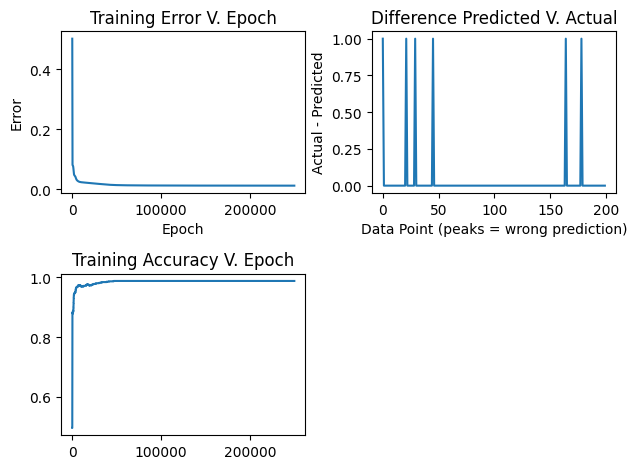

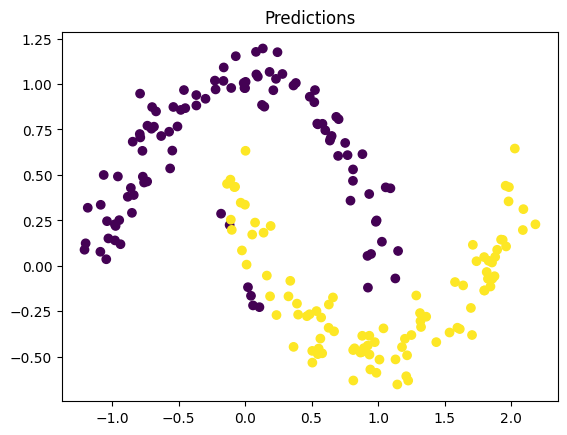

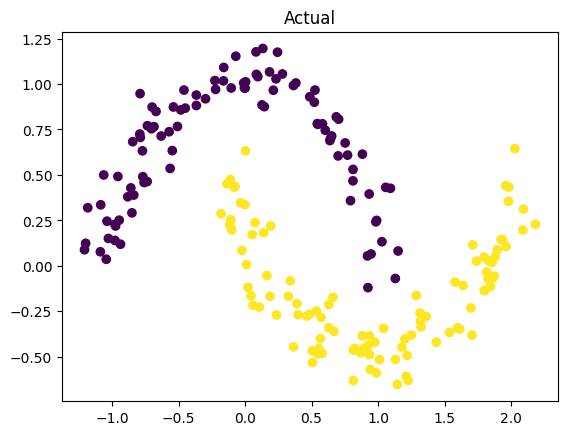

In [383]:
# plot model info
plt.subplot(2,2,1)
plt.title('Training Error V. Epoch')
plt.plot(m_t.error)
plt.xlabel("Epoch")
plt.ylabel("Error")

plt.subplot(2,2,2)
plt.title('Difference Predicted V. Actual')
plt.plot(range(len(y_test)), y_test - np.rint(predictions))
plt.xlabel("Data Point (peaks = wrong prediction)")
plt.ylabel("Actual - Predicted")

plt.subplot(2,2,3)
plt.title('Training Accuracy V. Epoch')
plt.plot(histm_t.accuracy)

plt.tight_layout()
plt.show()

# plot results
plt.title('Predictions')
plt.scatter(X_test[:,0], X_test[:,1], c=predictions)
plt.show()

plt.title('Actual')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.show()

### OPTIONAL / FOR FUN

With a classification task like this it can be helpful to visualize the decision boundaries that your model learns. I found [this stackoverflow post](https://stackoverflow.com/questions/32921268/multilayer-perceptron-visualizing-decision-boundaries-2d-in-python) detailing how to plot the decision boundary of your model, and adapted it so that it *should* work with your model, though you may need to tweak the model name (`network`) if you've used something different.

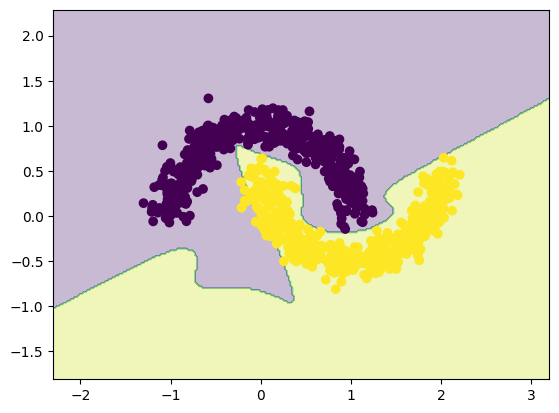

In [384]:
h = .02  # step size in the mesh
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = m_t.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.round(Z).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(features[:, 0], features[:, 1], c=labels)
plt.show()

## c) Findings [2 points]
 Report on your findings, such as what values did you end up using for your hyperparameters, why did you choose those values, what was the final accuracy of your model, and anything else you think might be of interest.

I ended up using 25 hidden neurons for the model I just tested each size of hidden neuron from 10-30 and around 23-25 seems to perform the best, the other ones either underfit and overfit really badly, I also settled around 250,000 epochs since the model already is reaching a pretty high testing and training accuracy even before then and it didn't really improve beyond that. the final accuracy of the model during the training stage is ~99% and testing accuracy was 97%

Discussion Here: